# THE SPARKS FOUNDATION

# NAME : POOJA YADAV

# Task 5 :- Exploratory Data Analysis-sports (Advanced Level)

# objective

- perform Exploratory data analysis on the dataset "indial premier league"
- As a sports analysts,find out most successfull teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for it products.

In [2]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Importing Matches dataset
data = pd.read_csv('matches.csv')

In [11]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [12]:
data.shape

(756, 18)

In [13]:
#Let's check names of all the columns(labels) present in the dataset
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
#Checking for null values in our data
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


- Form above table we can conclude that no.of matches are 756 played. And we can say Average number of runs needed to win are 13.28.

In [18]:
data.duplicated().sum()

0

In [19]:
Data = pd.read_csv("deliveries.csv")

Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
season_data=data[['id','season','winner']]

complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [21]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [22]:
data = data.drop(columns=["umpire3"],axis=1)

data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [23]:
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

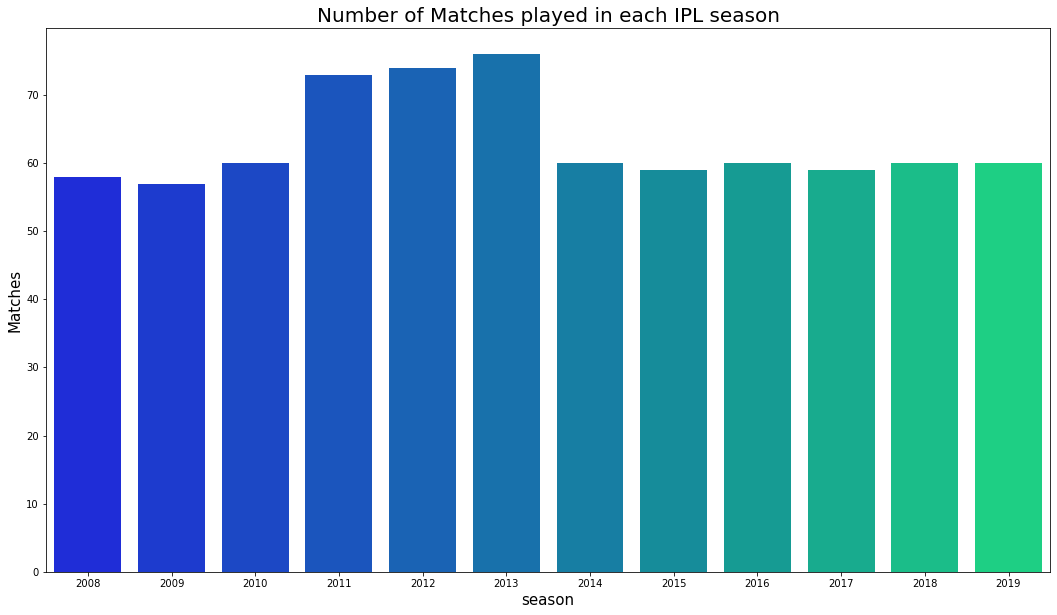

In [26]:

plt.figure(figsize = (18,10))
sns.countplot('season',data=data,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

- With this, we can say that the Season which consisted of the highest number of matches played in is 2013.

<AxesSubplot:xlabel='winner'>

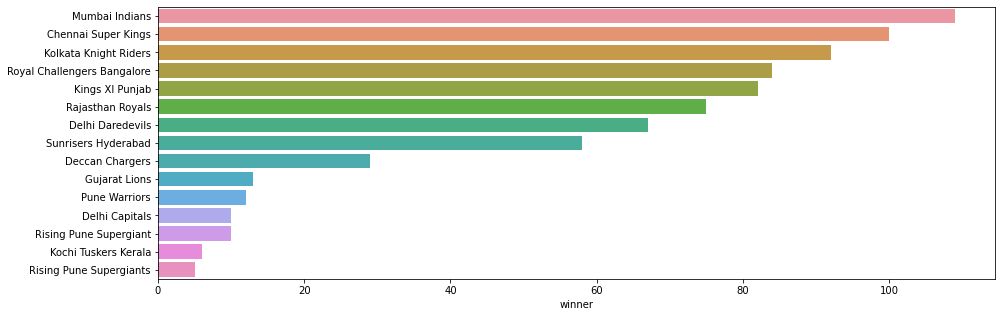

In [27]:

#Visualizing the most successful team according to the data.
fig_size=(15,5)
fig,ax=plt.subplots(figsize=fig_size)
df1=data.winner.value_counts()
sns.barplot(x=df1, y=df1.index)


- By looking at the graph we can find out that the most successful team is Mumbai Indians next Chennai Super Kings and so on...

In [28]:
#Let's check the probability of winning a match if the toss was won.
prob_of_win = data['toss_winner'] == df['winner']
prob_of_win.groupby(prob_of_win).size()

False    363
True     393
dtype: int64

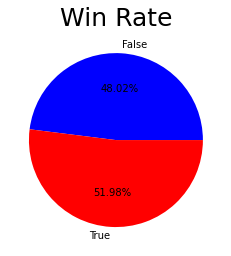

In [29]:
win_rate=prob_of_win.groupby(prob_of_win).size()
labels=['False','True']
plt.pie(win_rate, labels=labels, autopct= '%0.2f%%',colors = ["blue","red"])
plt.title('Win Rate',fontsize=25)
plt.show()


- "Flase" in the sense that the team won the toss but lost the game. "True" in the sense that the team won the toss and won the game.

- So from the pie chart, we can conclude that the toss won't matter a lot because there is only a slight advantage that the team will win if they actually won the toss.

In [30]:
#Highest wins by teams per Season
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [31]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

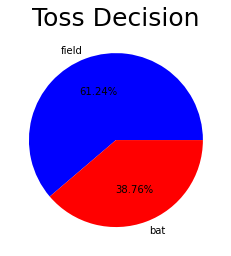

In [33]:
toss=data['toss_decision'].value_counts()
labels=['field','bat']
plt.pie(toss, labels=labels,colors = ["blue","red"], autopct= '%0.2f%%')
plt.title('Toss Decision',fontsize=25)
plt.show()

- From the pie chart above we can say that the teams who won the toss mostly chose to Field(bowling).

In [34]:
#Let's check who was the man of the match many times.
data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
BA Bhatt           1
M Ur Rahman        1
S Sreesanth        1
AP Tare            1
JDP Oram           1
Name: player_of_match, Length: 226, dtype: int64

- From the data above we can conclude 'CH Gayle' was the man of the match with 21 times titles and 'AB de Villiers' was the next with 20 times titled man of the match.

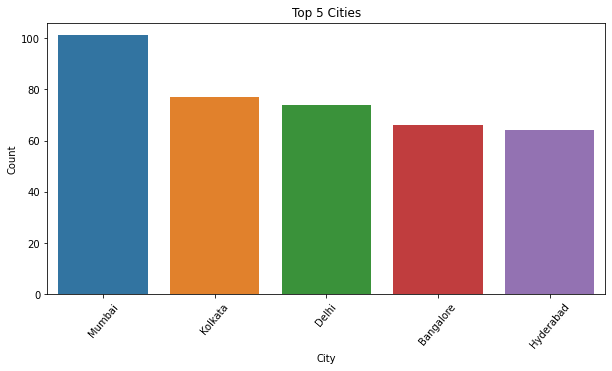

In [35]:
#Visualizing top 5 Cities where the most number of matches were played.
plt.subplots(figsize=(10,5))
sns.barplot(data['city'].value_counts()[:5].index,data['city'].value_counts()[:5].values)
plt.title('Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

- The most number of matches were played in Mumbai City

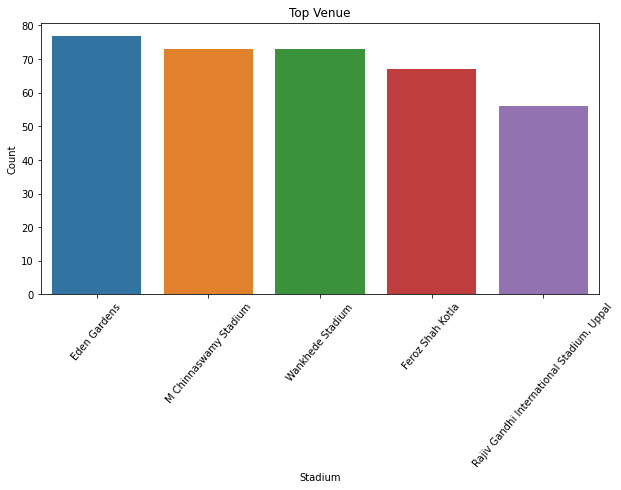

In [36]:
#Visualizing top 5 Venue spots where the most number of matches were played.
plt.subplots(figsize=(10,5))
sns.barplot(data['venue'].value_counts()[:5].index,data['venue'].value_counts()[:5].values)
plt.title('Top Venue')
plt.xlabel('Stadium')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

- Eden Gardens was the Venue for most number of matches.

In [62]:

#The Team which won by scoring maximum runs.
data.iloc[df['win_by_runs'].idxmax()]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          7
ball                                          6
batsman                                S Dhawan
non_striker                        MC Henriques
bowler                                YS Chahal
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  1
extra_runs                                    0
total_runs                                    1
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [63]:
#The team which won by consuming minimum runs
data.iloc[df['win_by_runs'].idxmin()]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          1
ball                                          2
batsman                               DA Warner
non_striker                            S Dhawan
bowler                                 TS Mills
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  0
extra_runs                                    0
total_runs                                    0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [64]:
#The team which won by consuming maximum wickets
data.iloc[df['win_by_wickets'].idxmax()]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          1
ball                                          3
batsman                               DA Warner
non_striker                            S Dhawan
bowler                                 TS Mills
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  4
extra_runs                                    0
total_runs                                    4
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [65]:
#The team which won by consuming minimum wickets
data.iloc[df['win_by_wickets'].idxmin()]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          1
ball                                          1
batsman                               DA Warner
non_striker                            S Dhawan
bowler                                 TS Mills
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  0
extra_runs                                    0
total_runs                                    0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [66]:

#Importing Deliveries dataset
data1 = pd.read_csv('deliveries.csv')

In [67]:
data1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [68]:
#Let's check names of all the columns(labels) present in the dataset
data1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [69]:
data1 = data1[['match_id','inning','batting_team','bowling_team','over','ball','batsman','non_striker','bowler','extra_runs','total_runs']]

In [70]:
data1.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,2


In [72]:
#Checking for null values in our data
data1.isnull().sum()

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
extra_runs      0
total_runs      0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [74]:
data1.describe()

,match_id,inning,over,ball,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,7.000000,10.000000



- We can see that the total extra runs per match are 0.06 by which we can conclude that bowling_team is performing amazingly, without losing any extra runs.

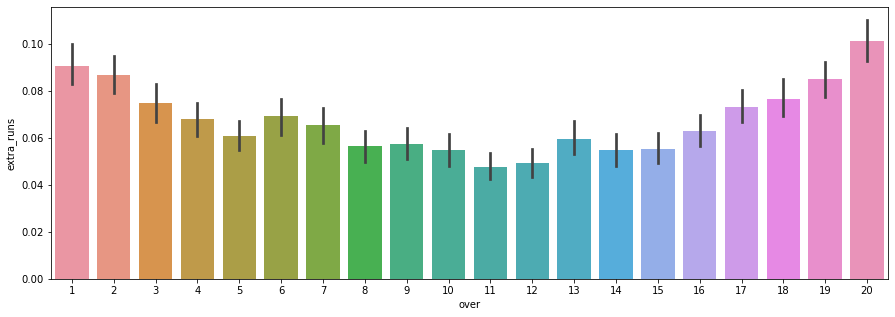

In [77]:
#Finding the overs where most extra runs were lost.
fig_size=(15,5)
fig,ax=plt.subplots(figsize=fig_size)
sns.barplot(x='over',y='extra_runs',data=data1)
plt.show()

In [76]:

#The Team which gave maximum extra runs.
data1.iloc[data1['extra_runs'].idxmax()]

match_id                     473
inning                         2
batting_team    Delhi Daredevils
bowling_team      Mumbai Indians
over                           5
ball                           2
batsman                  M Vijay
non_striker            Q de Kock
bowler                SL Malinga
extra_runs                     7
total_runs                     7
Name: 112093, dtype: object

In [78]:
#The Team which gave minimum extra runs.
data1.iloc[data1['extra_runs'].idxmin()]

match_id                                  1
inning                                    1
batting_team            Sunrisers Hyderabad
bowling_team    Royal Challengers Bangalore
over                                      1
ball                                      1
batsman                           DA Warner
non_striker                        S Dhawan
bowler                             TS Mills
extra_runs                                0
total_runs                                0
Name: 0, dtype: object

In [79]:
#The Team which scored maximum runs in a over.
data1.iloc[data1['total_runs'].idxmax()]

match_id                               7896
inning                                    1
batting_team    Royal Challengers Bangalore
bowling_team          Kolkata Knight Riders
over                                      5
ball                                      1
batsman                         BB McCullum
non_striker                         V Kohli
bowler                        Kuldeep Yadav
extra_runs                                5
total_runs                               10
Name: 150968, dtype: object

In [80]:
#The Team which bolwed amazingly gave minimum runs in a over.
data1.iloc[data1['total_runs'].idxmin()]

match_id                                  1
inning                                    1
batting_team            Sunrisers Hyderabad
bowling_team    Royal Challengers Bangalore
over                                      1
ball                                      1
batsman                           DA Warner
non_striker                        S Dhawan
bowler                             TS Mills
extra_runs                                0
total_runs                                0
Name: 0, dtype: object

# Conclusion :

- The highest number of match played in IPL season was 2013,2014,2015.

- The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

- Teams which Bowl first has higher chances of winning then the team which bat first.

- After winning toss more teams decide to do fielding first.

- In finals teams which decide to do fielding first win the matches more then the team which bat first.

- In finals most teams after winning toss decide to do fielding first.

- Top player of match winning are CH gayle, AB de villers.

- It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

- The highest number of four hit by player is Shikar Dhawan.

- The highest number of six hit by player is CH gayle.

- Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

- The highest number of matches played by player name are SK Raina, RG Sharma.

- Dismissals in IPL was most by Catch out .

- The IPL most wicket taken blower is SL Malinga.

# THANK YOU